In [1]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

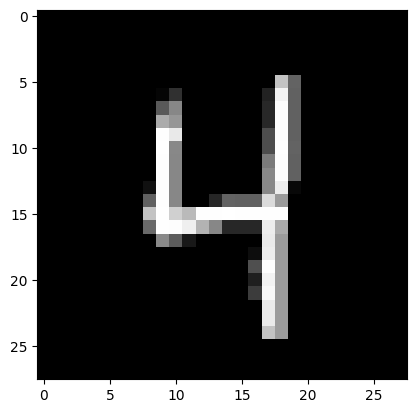

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[92],cmap='gray')

In [5]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# brought down the all values in the range of 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) ## 128 nodes
model.add(Dense(32,activation='relu')) ## 32 nodes
model.add(Dense(10,activation='softmax') ) ## 10 because we have 10 classes 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.2074 - val_accuracy: 0.9763
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.2065 - val_accuracy: 0.9772
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.2070 - val_accuracy: 0.9775
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.2162 - val_accuracy: 0.9762
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.1842 - val_accuracy: 0.9786
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.2121 - val_accuracy: 0.9770
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.2278 - val_a

In [14]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [15]:
y_pred=y_pred.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.9765
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.99      0.96      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

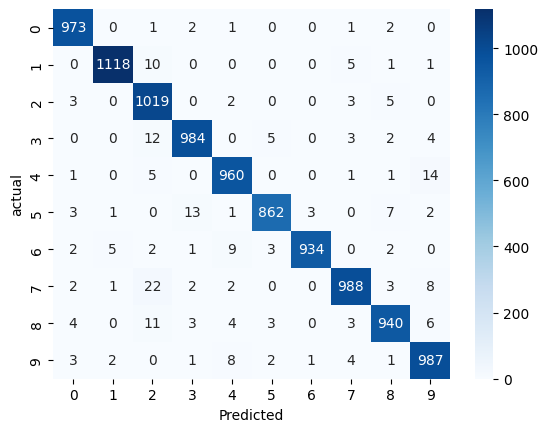

In [18]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

In [19]:
import numpy as np

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Example: Print for digit '3'
i = 3
print(f"Digit {i} → TP: {TP[i]}, FP: {FP[i]}, FN: {FN[i]}, TN: {TN[i]}")


Digit 3 → TP: 984, FP: 22, FN: 26, TN: 8968


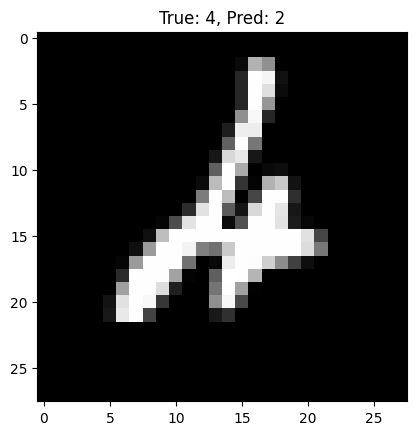

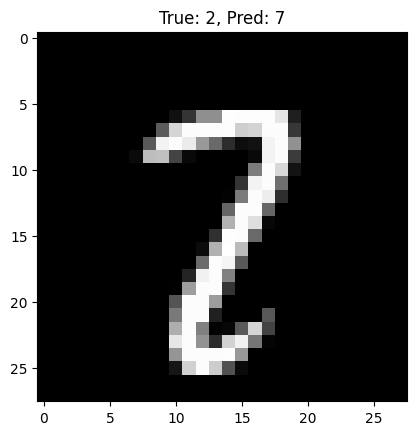

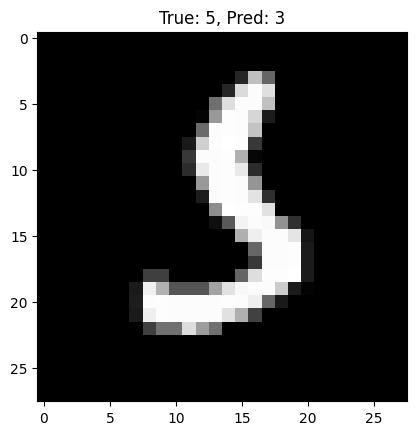

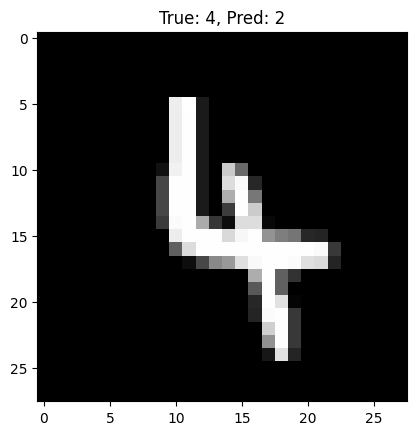

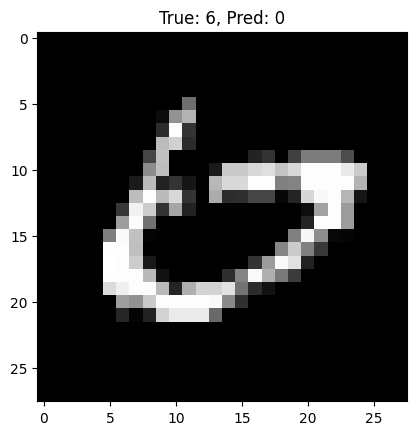

In [20]:
import numpy as np

misclassified_indices = np.where(y_pred != y_test)[0]

for i in misclassified_indices[:5]:  # Show first 5
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.show()


In [ ]:
print("TensorFlow version:", tensorflow.__version__)
print("GPU Available:", tensorflow.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
tensorflow.debugging.set_log_device_placement(True)


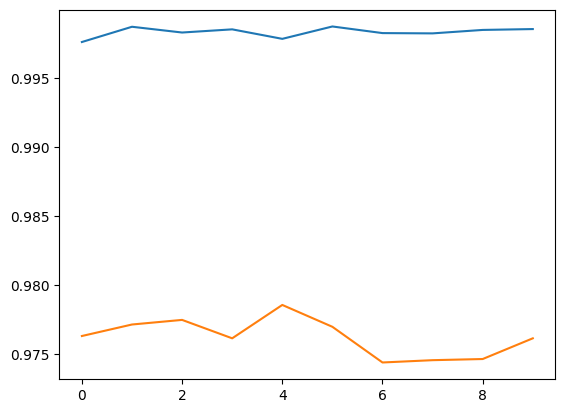

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

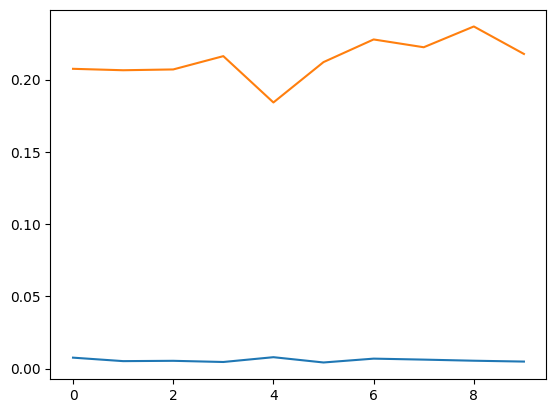

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])